# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [1]:
import pandas            as pd
import numpy             as np

import matplotlib.pyplot as plt

import lasio

In [2]:
pwd

'/home/ehgeraldo/repos/Well_Log_Plots_Applications'

In [3]:
ls -l

total 8240
-rw-rw-r-- 1 ehgeraldo ehgeraldo  479237 ago 29 22:33 c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   95981 ago 29 22:34 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  398435 ago 29 22:37 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  395869 ago 29 22:43 c3.3-ehgeraldo_matplotlib_subplots.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 5739415 ago 27 17:21 c4.4-ehgeraldo_matplotlib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  201758 ago 29 17:10 c5.5-ehgeraldo_shading.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  247083 ago 29 22:30 c6.6-ehgeraldo_matplotlib_subplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  803860 ago 30 16:10 c7.7-ehgeraldo_well_locations.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   46921 ago 31 22:16 c8.8-ehgeraldo_well_boxplots.ipynb
drwxrwxr-x 2 ehgeraldo ehgeraldo    4096 ago 30 10:42 data/


In [4]:
df_raw = lasio.read('/home/ehgeraldo/repos/Well_Log_Plots/data/15-9-19_SR_COMP.LAS').df()

## Data dimensions

In [5]:
print('Number of rows: {}'.format(df_raw.shape[0]))
print('Number of cols: {}'.format(df_raw.shape[1]))

Number of rows: 6701
Number of cols: 7


## Data types

In [6]:
df_raw.dtypes

AC      float64
CALI    float64
DEN     float64
GR      float64
NEU     float64
RDEP    float64
RMED    float64
dtype: object

## Check NAs 

In [7]:
df_raw.isna().sum()

AC      122
CALI    122
DEN      45
GR       12
NEU      33
RDEP      0
RMED      0
dtype: int64

In [8]:
df_raw.dropna(inplace=True)

In [9]:
df_raw.sample().T

DEPT,4029.8096
AC,58.9872
CALI,9.5238
DEN,2.6680
GR,10.4433
NEU,4.0616
RDEP,6.0940
RMED,7.9869


## Data Describe

In [10]:
df_raw.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000
mean,78.313607,9.550656,2.459512,35.814045,17.989428,3.257043,3.117874
std,17.009535,0.906267,0.163524,26.848476,11.770996,8.937792,6.358822
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,66.169300,9.142900,2.339150,14.567300,10.156650,0.794950,0.846850
50%,74.145900,9.523800,2.515400,31.706400,15.158800,1.813600,1.849500
75%,89.024250,9.904800,2.590450,50.767000,23.103300,3.406250,3.587400
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


## Descriptive Statistical

In [11]:
num_attributes = df_raw.select_dtypes('float64')

In [12]:
num_attributes.sample(2)

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3658.8680,100.8148,8.9524,2.1573,26.6100,30.0620,0.4127,0.5072
4381.5488,69.1013,10.2857,2.5500,54.1428,18.1161,1.6930,1.5403


## Numerical Attributes

In [13]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [14]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,AC,1.0251,149.2187,148.1936,78.313607,74.1459,17.008242,0.568821,0.188815
1,CALI,6.0000,20.2857,14.2857,9.550656,9.5238,0.906198,1.356733,26.107515
2,DEN,2.0377,3.0013,0.9636,2.459512,2.5154,0.163511,-0.781671,-0.601550
3,GR,2.7661,304.3337,301.5676,35.814045,31.7064,26.846435,3.532985,26.981597
4,NEU,2.1783,146.3474,144.1691,17.989428,15.1588,11.770101,2.309390,9.358745
5,RDEP,0.2503,198.5371,198.2868,3.257043,1.8136,8.937113,12.823084,189.866496
6,RMED,0.2947,115.6350,115.3403,3.117874,1.8495,6.358339,10.275765,128.518434


## Data Plotting

In [15]:
df_raw.columns

Index(['AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED'], dtype='object')

<AxesSubplot:>

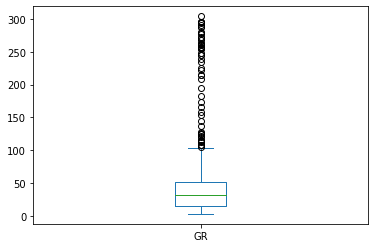

In [21]:
# Gamma box ploting

df_raw['GR'].plot(kind='box')

<AxesSubplot:>

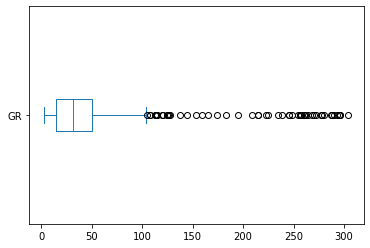

In [23]:
#Gamma box ploting horizontal view

df_raw['GR'].plot(kind='box', vert=False)

[]

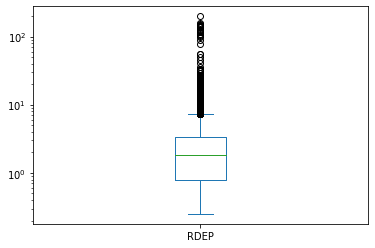

In [18]:
# Resistivity box plot logarithmically scalled

df_raw['RDEP'].plot(kind='box')
plt.semilogy()

[]

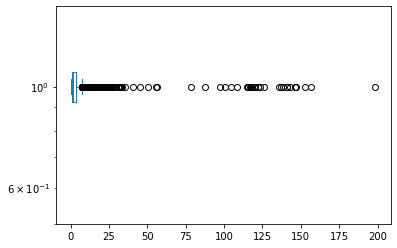

In [24]:
# Resistivity box plot logarithmically scalled, horizontal view

df_raw['RDEP'].plot(kind='box', vert=False)
plt.semilogy()

# Styling the Boxplot 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c165ce040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c1654e400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c165ce790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c1650f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c1650fa30>],
 'means': []}

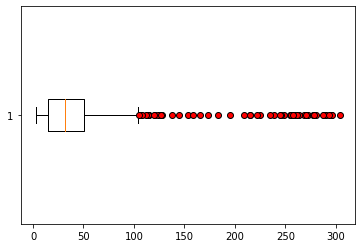

In [26]:
# Changing the outlier markers

red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df_raw['GR'], vert=False, flierprops=red_circle)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c151cc310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c151d0e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c151c70d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c151d64c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c15158850>],
 'means': []}

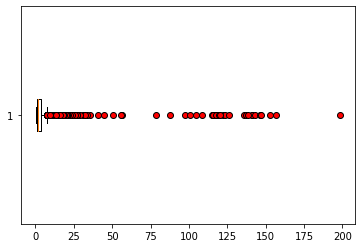

In [39]:
# Changing the outlier markers

red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df_raw['RDEP'], vert=False, flierprops=red_circle)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c15e00280>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c15e00460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c15e00190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c15c4bd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c15c4b2e0>],
 'means': [<matplotlib.lines.Line2D at 0x7f3c15c4b9a0>]}

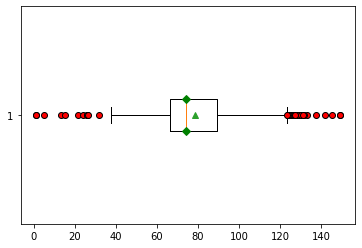

In [42]:
# Adding the mean

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df_raw['AC'], vert=False, flierprops=red_circle,
           showmeans=True, medianprops=mean_shape)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c171b23d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c16b1afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c171b24c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c16b1a4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c166ef6a0>],
 'means': [<matplotlib.lines.Line2D at 0x7f3c16b1a430>]}

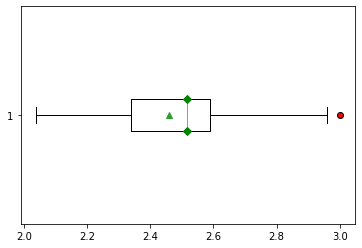

In [43]:
# Adding the mean

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df_raw['DEN'], vert=False, flierprops=red_circle,
           showmeans=True, medianprops=mean_shape)

# Displaying multiple boxplots on 

<AxesSubplot:>

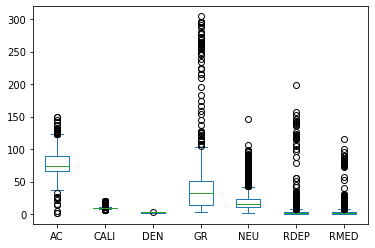

In [45]:
# Displaying all columns in the dataframe

df_raw.plot(kind='box')

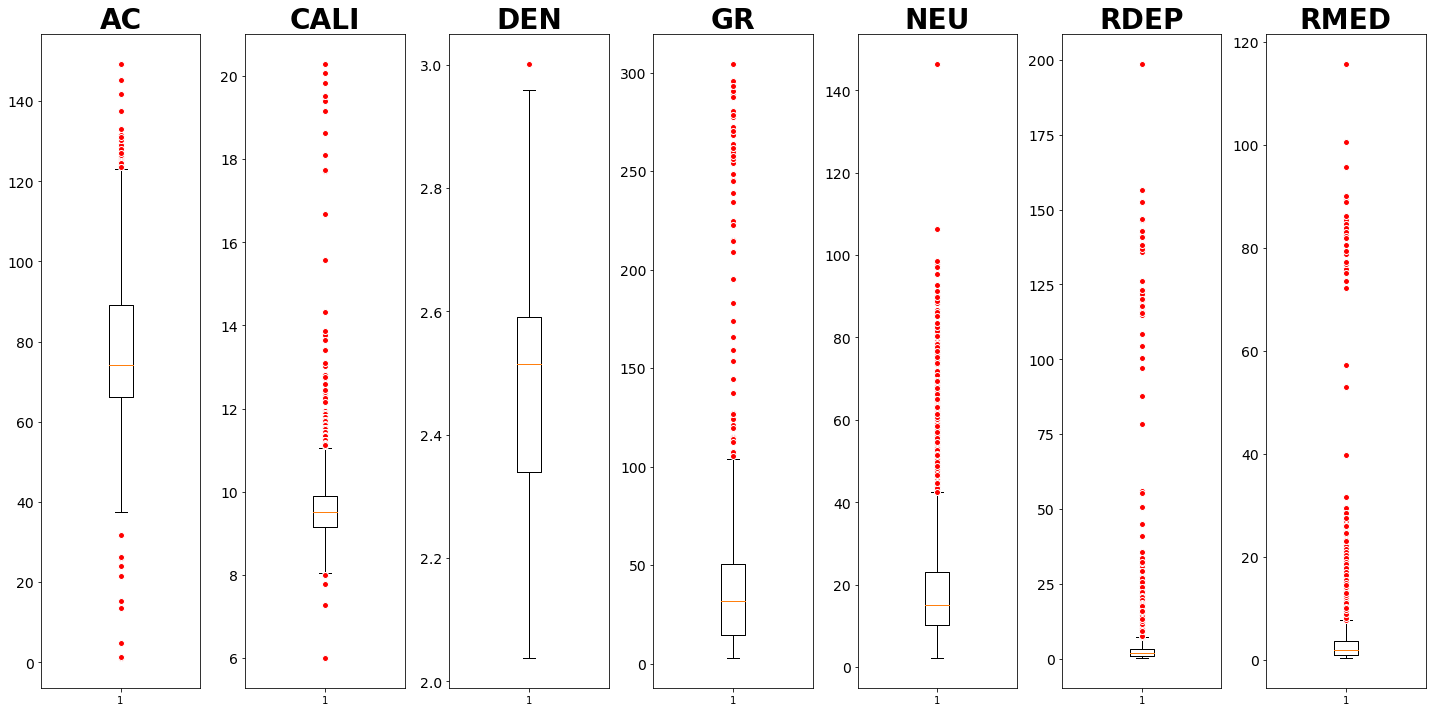

In [46]:
# Subplot of each column

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_raw.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_raw.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_raw.columns[i], fontsize=28, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

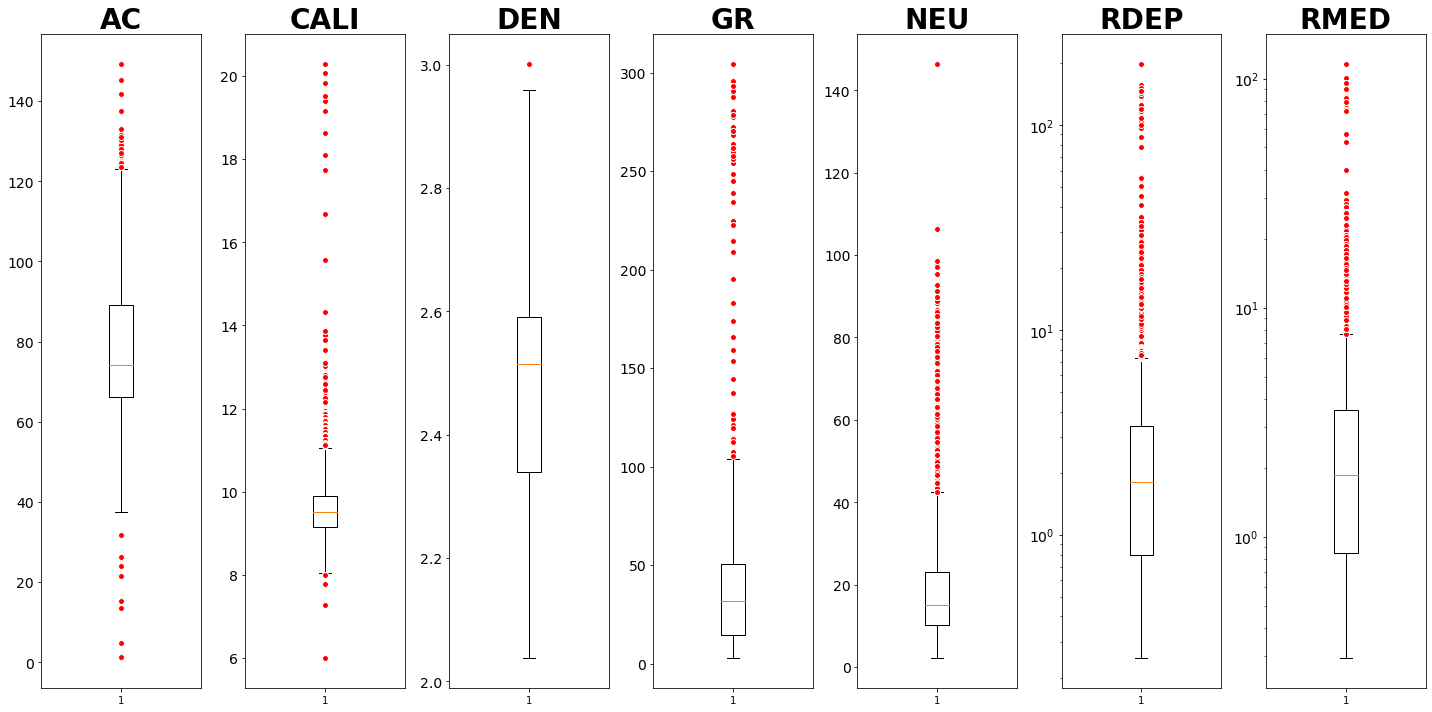

In [52]:
# Subplot of each column

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_raw.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_raw.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_raw.columns[i], fontsize=28, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df_raw.columns[i] == 'RDEP' or df_raw.columns[i] == 'RMED':
        ax.semilogy()
    
plt.tight_layout()